# Data Visualization and Exploration

Simple notebook to visualize data

In [1]:
import os
from pathlib import Path

In [2]:
# change working directory to the root of the project
cwd = Path.cwd()
if cwd.name == "notebooks":
    os.chdir("..")

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

from baseg.datasets import EMSImageDataset, EMSCropDataset
from baseg.samplers import RandomTiledBatchSampler


In [4]:
dataset = EMSImageDataset(root=Path("data/ems/train"))
crop_dataset = EMSCropDataset(root=Path("data/ems/train"))

In [5]:
def mask2rgb(image: np.ndarray, palette: dict) -> np.ndarray:
    lut = np.zeros((256, 3), dtype=np.uint8)
    for k, v in palette.items():
        lut[k, :] = v
    return lut[image]

In [6]:
def ask_user():
    while True:
        answer = input("Continue? [Y/n] ")
        if answer.lower() in ["y", "yes", ""]:
            return True
        elif answer.lower() in ["n", "no"]:
            return False

IndexedBounds(index=203, coords=(1207, 129, 512, 512))


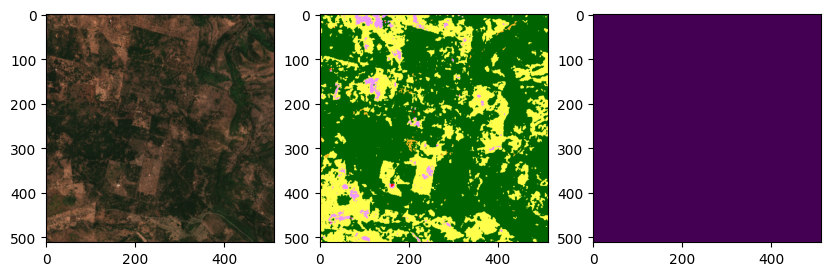

IndexedBounds(index=203, coords=(70, 927, 512, 512))


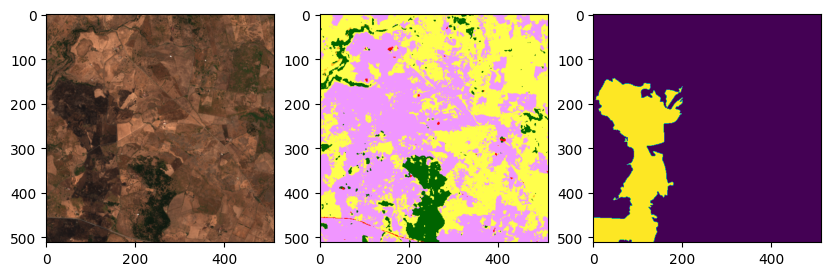

IndexedBounds(index=203, coords=(1110, 956, 512, 512))


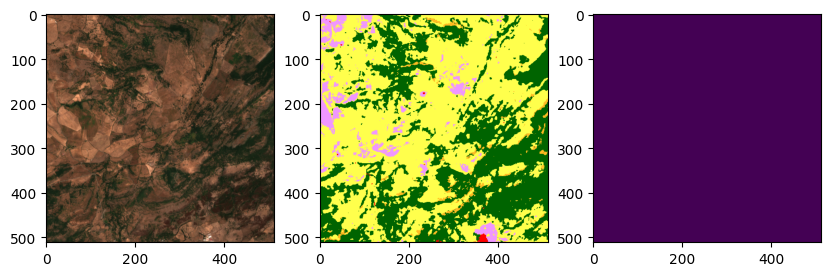

IndexedBounds(index=203, coords=(778, 1139, 512, 512))


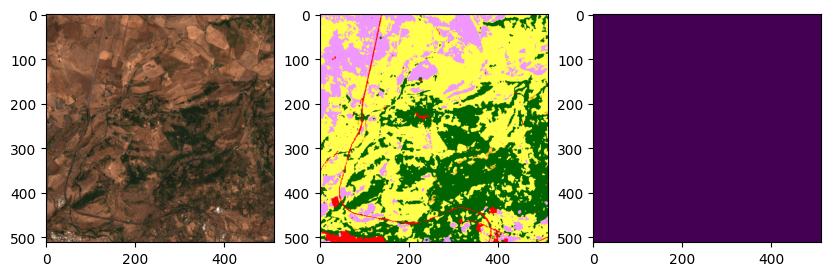

IndexedBounds(index=203, coords=(1056, 250, 512, 512))


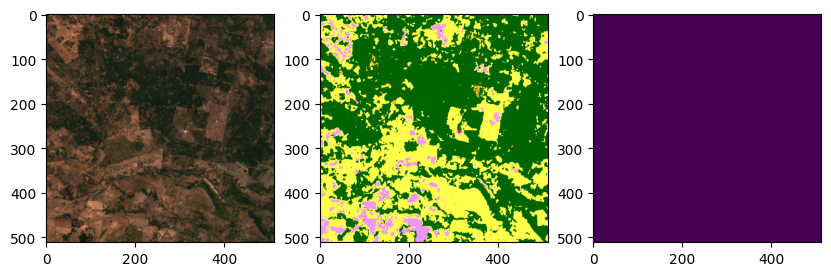

IndexedBounds(index=203, coords=(7, 1088, 512, 512))


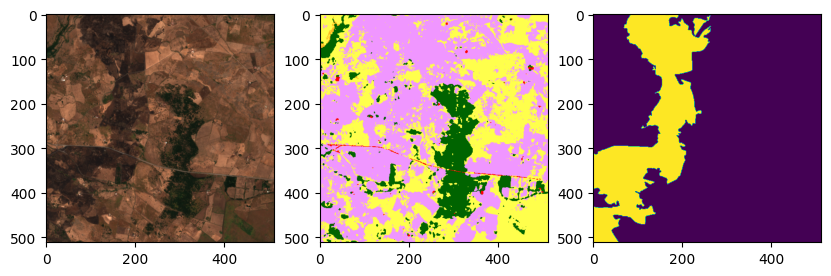

IndexedBounds(index=203, coords=(874, 153, 512, 512))


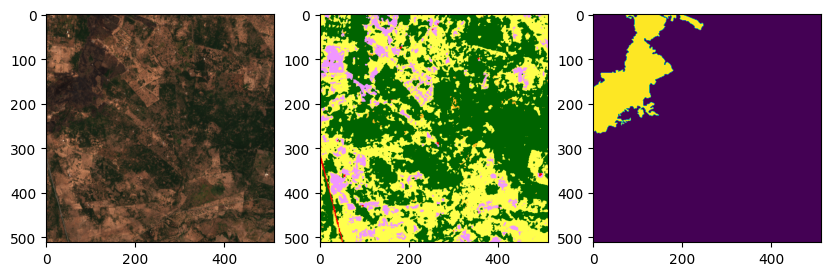

IndexedBounds(index=203, coords=(218, 345, 512, 512))


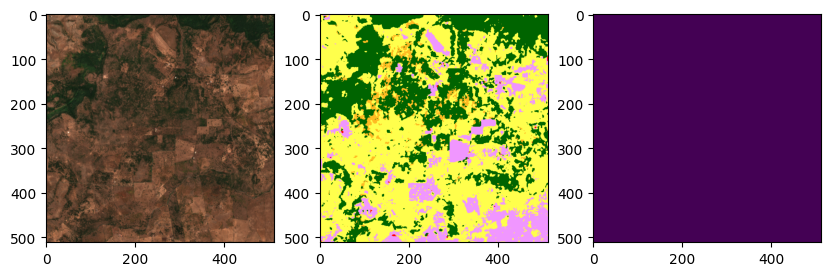

In [17]:
sampler = RandomTiledBatchSampler(dataset=crop_dataset, tile_size=512, batch_size=8)
batch = next(iter(sampler))
for bounds in batch:
    print( bounds)
    sample = crop_dataset[bounds]
    s2 = sample["S2L2A"][[3,2,1]]
    lc = sample["ESA_LC"]
    msk = sample["DEL"]
    s2 = np.moveaxis(s2, 0, -1) * 3
    s2 = np.clip(s2, 0, 1)
    lc = mask2rgb(lc[0], palette=crop_dataset.palette)
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))
    ax[0].imshow(s2)
    ax[1].imshow(lc)
    ax[2].imshow(msk[0])
    plt.show() 

In [ ]:
continued = True

while continued:
    i = np.random.randint(len(dataset))
    sample = dataset[i]
    s2_image = sample["S2L2A"][[3, 2, 1], :, :]
    s2_image = np.moveaxis(s2_image, 0, -1)
    lc = sample["ESA_LC"][0].astype(np.uint8)
    delineation = sample["DEL"][0].astype(np.uint8)
    # flip the lc
    # lc = np.flip(lc, axis=0)
    lc[delineation == 1] = 255
    # plot image and mask side by side
    fig, ax = plt.subplots(1, 2, figsize=(14, 7))
    ax[0].imshow(s2_image * 3)
    ax[1].imshow(mask2rgb(lc, EMSImageDataset.palette))
    plt.show()
    # prompt user to continue
    continued = ask_user()
    clear_output(wait=True)